<a href="https://colab.research.google.com/github/sujataprasad01/ML-Predicting-the-House-price/blob/main/Predicting_the_House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_openml

# Problem Statement

* You have been given a dataset that describes the houses in Boston. Now, based on the given features, you have to predict the house price.

In [2]:
boston = fetch_openml(name='boston', version=2)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X= boston.data
y=boston.target

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
y

0      N
1      P
2      N
3      N
4      N
      ..
501    P
502    P
503    N
504    P
505    P
Name: binaryClass, Length: 506, dtype: category
Categories (2, object): ['N', 'P']

In [ ]:
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [ ]:
y.head(10)

0    N
1    P
2    N
3    N
4    N
5    N
6    N
7    N
8    P
9    P
Name: binaryClass, dtype: category
Categories (2, object): ['N', 'P']

# Adding the target column into the dataframe X

In [4]:
X["Price"]=boston.target

In [ ]:
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,N
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,P
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,N
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,N
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,N
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,N
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,N
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,N
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,P
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,P


In [ ]:
X.shape

(506, 14)

In [ ]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [ ]:
X.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD         float64
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
Price      category
dtype: object

In [ ]:
X.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price        2
dtype: int64

In [ ]:
X.nunique().sum()

2838

In [5]:
X.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [7]:
X.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
X.corr

<bound method DataFrame.corr of         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT Price  
0       15.3  396.90   4.98     N  
1      

<ipython-input-9-393e36632074>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=X.corr(), annot=True)


<Axes: >

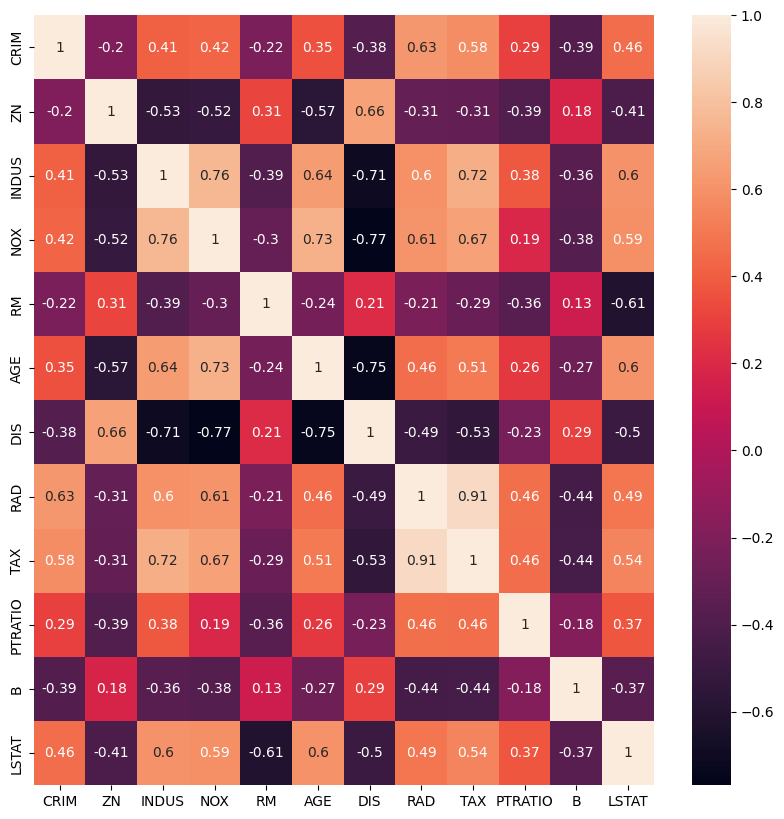

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data=X.corr(), annot=True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


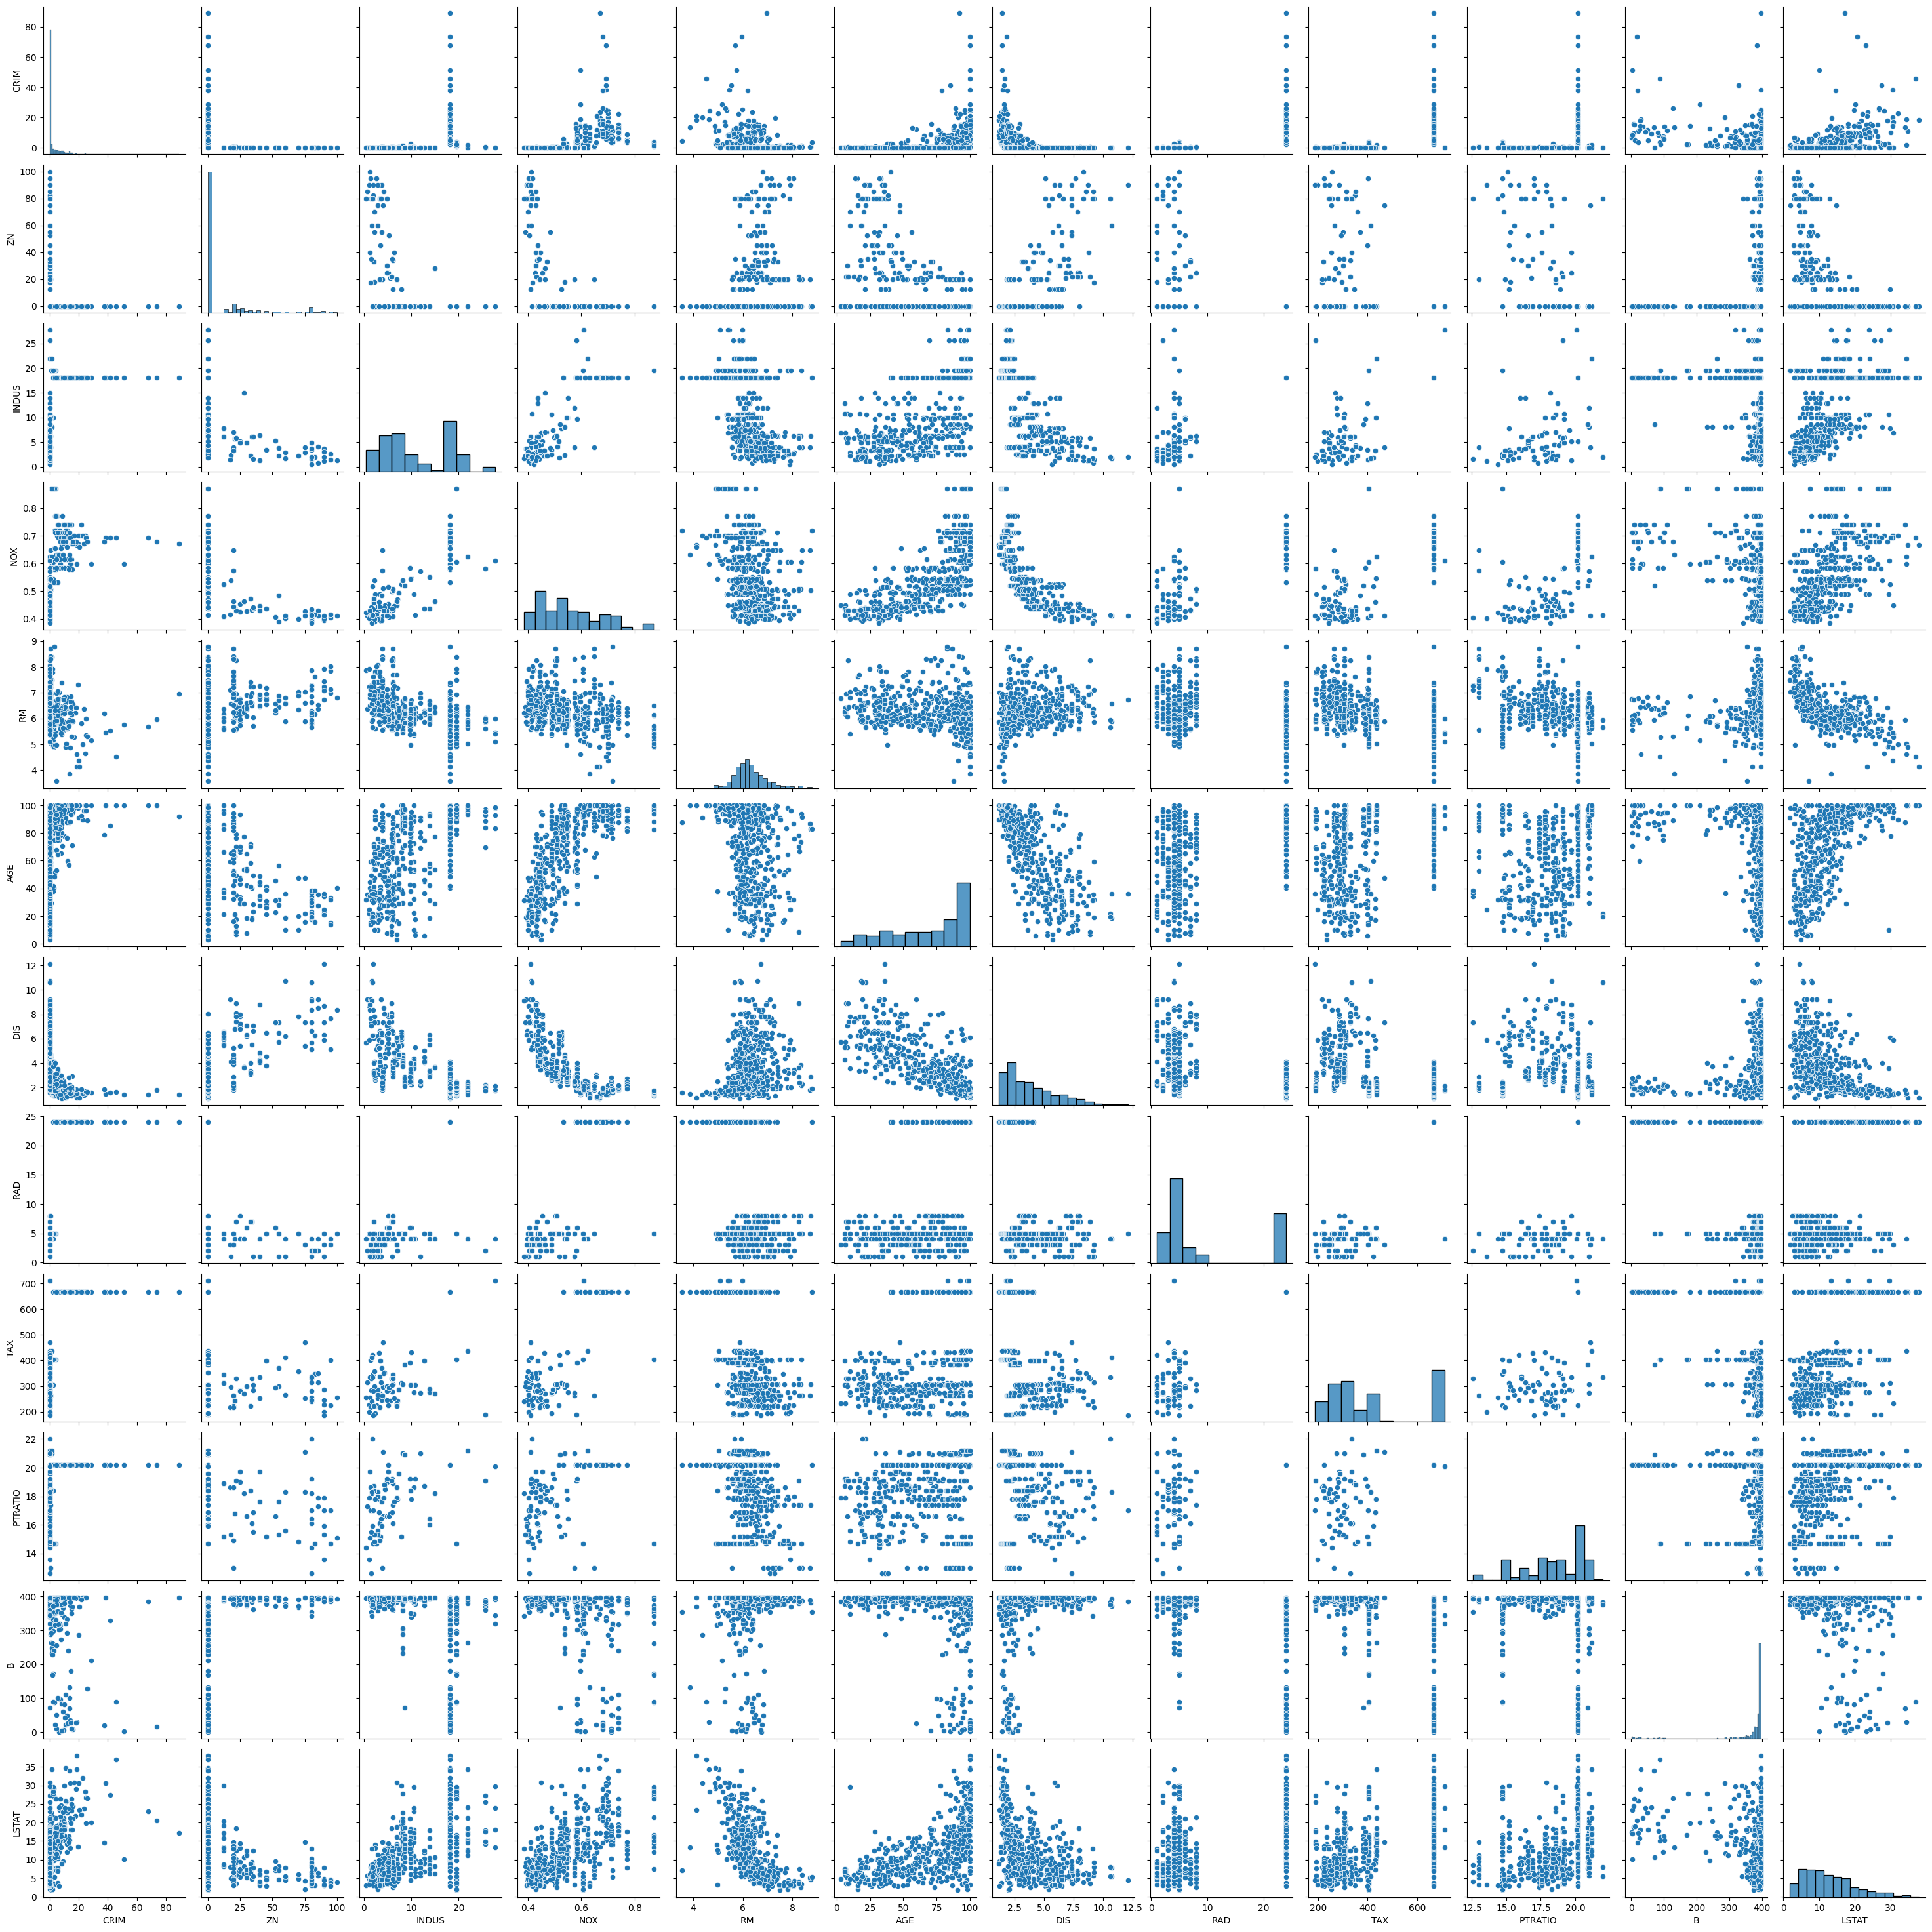

In [10]:
sns.pairplot(X, size=2.5)

# Export the dataset

In [ ]:
X.to_csv('boston_dataset.csv', )

# Machine Learning - Linear Regression

# New Section